# **TASK 3:CAR PRICE PREDICTION WITH MACHINE LEARNING**

***Question ??? .....
*The price of a car depends on a lot of factors like the goodwill of the brand of the car, features of the car, horsepower and the mileage it gives and many more. Car price prediction is one of the major research areas in machine learning. So if you want to learn how to train a car price prediction model then this project is for you.**

**1.Explanation of Imports**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Explanation of Imports:**

1.	pandas as pd: Imports the Pandas library, used for data manipulation and analysis.
2.	numpy as np: Imports the NumPy library, used for numerical operations and array manipulation.
3.	matplotlib.pyplot as plt: Imports the Matplotlib library for creating visualizations.
4.	seaborn as sns: Imports the Seaborn library, built on Matplotlib, providing more visually appealing statistical plots.
5.	sklearn.model_selection import train_test_split, GridSearchCV: Imports functions for splitting data into training and testing sets and for performing grid search hyperparameter optimization.
6.	sklearn.preprocessing import LabelEncoder, StandardScaler: Imports functions for encoding categorical features (LabelEncoder) and scaling numerical features (StandardScaler).
7.	sklearn.linear_model import LinearRegression: Imports the Linear Regression model.
8.	sklearn.tree import DecisionTreeRegressor: Imports the Decision Tree Regression model.
9.	sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor: Imports Random Forest and Gradient Boosting models, which are ensemble methods.
10.	sklearn.svm import SVR: Imports Support Vector Regression (SVR).
11.	sklearn.metrics import mean_squared_error, r2_score: Imports metrics for evaluating model performance, specifically mean squared error (MSE) and R-squared.
12.	from google.colab import drive: Used in Google Colab to mount your Google Drive for accessing files.



**2.Data Loading and Exploration:**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Dataset/car data.csv')
print(data.head())

print(data.info())  # Check for data types, missing values
print(data.describe()) # Get statistical summary

  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  3

**Data Loading and Exploration:**

1.	data = pd.read_csv('/content/drive/MyDrive/Dataset/car data.csv'): Reads the dataset from your Google Drive into a Pandas DataFrame.
2.	print(data.head()): Displays the first few rows of the DataFrame to get a quick look at the data.
3.	print(data.info()): Provides information about the DataFrame, including data types of each column, non-null counts, and memory usage. This helps identify any potential issues with data types or missing values.
4.	print(data.describe()): Calculates descriptive statistics (like mean, standard deviation, quartiles, etc.) for numerical columns in the DataFrame. This gives a summary of the distribution of numerical data.



**3.Visualization:**

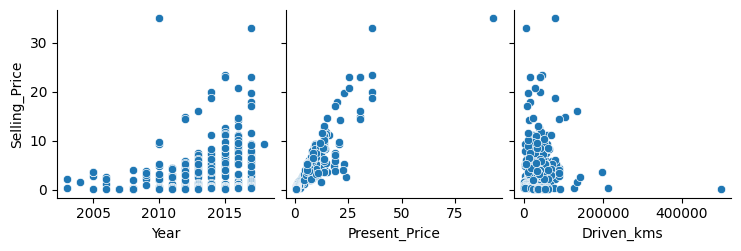

In [ ]:
# 2.1 Pair Plot
sns.pairplot(data, x_vars=['Year', 'Present_Price', 'Driven_kms'], y_vars='Selling_Price')
plt.show()

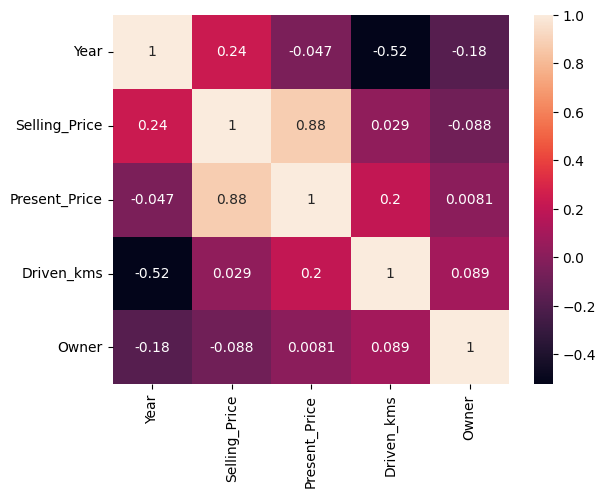

In [ ]:
# 2.2 Correlation Heatmap
# Exclude non-numerical columns before calculating correlation
numerical_data = data.select_dtypes(include=['float', 'int'])
sns.heatmap(numerical_data.corr(), annot=True)
plt.show()

**Visualization**

1. sns.pairplot(data, x_vars=['Year', 'Present_Price', 'Driven_kms'], y_vars='Selling_Price'): Creates a pair plot, showing the relationships between specified features (Year, Present_Price, Driven_kms) and the target variable (Selling_Price).

2. sns.heatmap(numerical_data.corr(), annot=True): Generates a correlation heatmap, displaying the correlation coefficients between numerical features. annot=True adds the correlation values onto the heatmap.

**4. Data Preprocessing:**

In [ ]:
# 3.1 Handle Missing Values
data['Present_Price'].fillna(data['Present_Price'].mean(), inplace=True)

# 3.2 Encode Categorical Features
label_encoder = LabelEncoder()
data['Fuel_Type'] = label_encoder.fit_transform(data['Fuel_Type'])
data['Selling_type'] = label_encoder.fit_transform(data['Selling_type'])
data['Transmission'] = label_encoder.fit_transform(data['Transmission'])

# 3.3 Remove Irrelevant Features
# Drop the 'Car_Name' column
data = data.drop('Car_Name', axis=1)

# 3.4 Feature Scaling
scaler = StandardScaler()
data[['Present_Price', 'Driven_kms']] = scaler.fit_transform(data[['Present_Price', 'Driven_kms']])

**Data Preprocessing:**


1.	data['Present_Price'].fillna(data['Present_Price'].mean(), inplace=True): Replaces missing values in the Present_Price column with the mean value of that column.
2.	label_encoder = LabelEncoder(): Creates an instance of LabelEncoder for converting categorical features into numerical representations.
3.	data['Fuel_Type'] = label_encoder.fit_transform(data['Fuel_Type']): Encodes the Fuel_Type column, converting categorical labels into numerical values.
4.	data = data.drop('Car_Name', axis=1): Removes the Car_Name column, likely assumed to be irrelevant for the prediction task.
5.	scaler = StandardScaler(): Creates an instance of StandardScaler for scaling features to have zero mean and unit variance.
6.	data[['Present_Price', 'Driven_kms']] = scaler.fit_transform(data[['Present_Price', 'Driven_kms']]): Scales the Present_Price and Driven_kms columns.



**5. Model Training and Evaluation:**

In [ ]:
# 4.1 Split Data into Training and Testing Sets
X = data.drop('Selling_Price', axis=1)
y = data['Selling_Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4.2 Train and Evaluate Different Models

# 4.2.1 Random Forest
rf_model = RandomForestRegressor()
param_grid = {'n_estimators': [100, 200, 300],
              'max_depth': [5, 10, 15],
              'min_samples_split': [2, 5, 10]}
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train, y_train)
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest:")
print("Mean Squared Error:", mse_rf)
print("R-squared:", r2_rf)

# 4.2.2 Gradient Boosting
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("\nGradient Boosting:")
print("Mean Squared Error:", mse_gb)
print("R-squared:", r2_gb)

# 4.2.3 Support Vector Regression
svr_model = SVR()
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)

mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print("\nSupport Vector Regression:")
print("Mean Squared Error:", mse_svr)
print("R-squared:", r2_svr)



Random Forest:
Mean Squared Error: 0.8407575702008715
R-squared: 0.9635017913498

Gradient Boosting:
Mean Squared Error: 0.7995919441530833
R-squared: 0.9652888363458376

Support Vector Regression:
Mean Squared Error: 24.392443501673473
R-squared: -0.05890273720591188


**Model Training and Evaluation**

1.	X = data.drop('Selling_Price', axis=1): Creates the feature matrix X by dropping the target column.
2.	y = data['Selling_Price']: Creates the target variable vector y.
3.	X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42): Splits the data into training (80%) and testing (20%) sets using train_test_split. random_state=42 ensures consistent splitting for reproducibility.

**Model Training and Evaluation (Example - Random Forest):**

1.	rf_model = RandomForestRegressor(): Initializes a Random Forest regression model.
2.	param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [5, 10, 15], 'min_samples_split': [2, 5, 10]}: Defines a grid of hyperparameters to search over.
3.	grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error'): Creates a GridSearchCV object to find the best combination of hyperparameters using 5-fold cross-validation.
4.	grid_search_rf.fit(X_train, y_train): Fits the GridSearchCV model to the training data.
5.	best_rf_model = grid_search_rf.best_estimator_: Retrieves the best performing Random Forest model from the grid search.
6.	y_pred_rf = best_rf_model.predict(X_test): Predicts the target values using the best Random Forest model on the test data.
7.	mse_rf = mean_squared_error(y_test, y_pred_rf): Calculates the mean squared error (MSE) for the Random Forest predictions.
8.	r2_rf = r2_score(y_test, y_pred_rf): Calculates the R-squared score for the Random Forest predictions.



**6. Visualizing Model Performance**

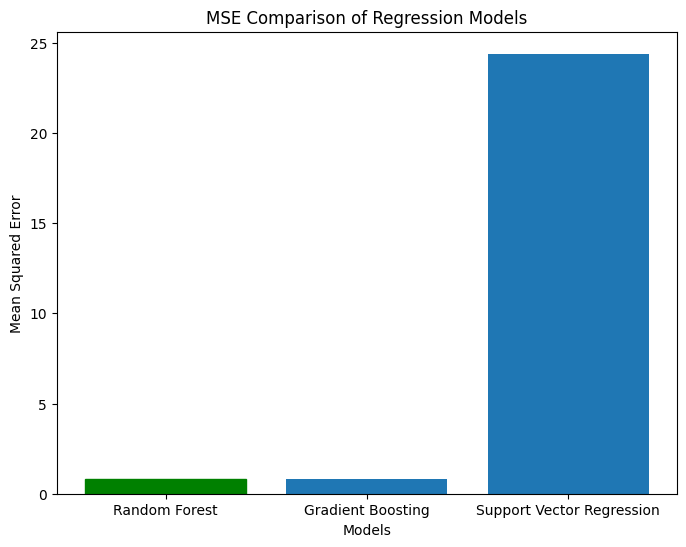

In [ ]:
# Visualizing Model Performance (Highlighting the Best Model)
models = ['Random Forest', 'Gradient Boosting', 'Support Vector Regression']

# Determine which model is best across both MSE and R-squared
best_model_across_metrics = None
if best_model_index_mse == best_model_index_r2:
   best_model_across_metrics = models[best_model_index_mse]

mse_scores = [mse_rf, mse_gb, mse_svr]
r2_scores = [r2_rf, r2_gb, r2_svr]

plt.figure(figsize=(8, 6))
bars = plt.bar(models, mse_scores)
bars[best_model_index_mse].set_color('green')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.title('MSE Comparison of Regression Models')
plt.show()


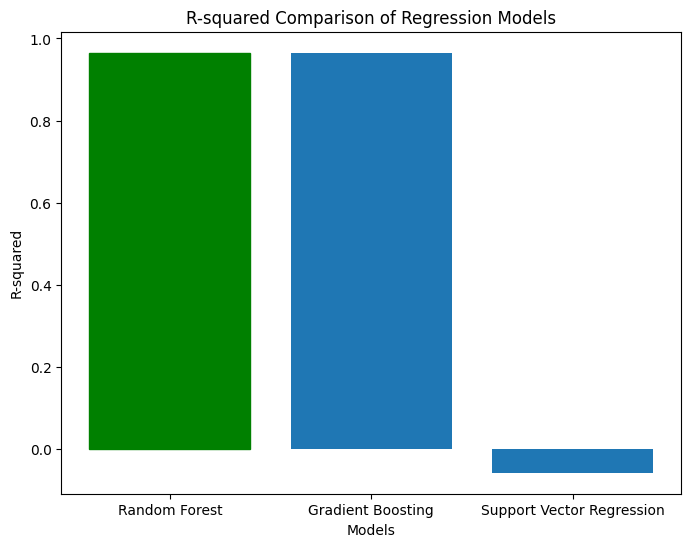

In [ ]:
plt.figure(figsize=(8, 6))
bars = plt.bar(models, r2_scores)
bars[best_model_index_r2].set_color('green')
plt.xlabel('Models')
plt.ylabel('R-squared')
plt.title('R-squared Comparison of Regression Models')
plt.show()



In [ ]:
# Print the best model across both metrics
if best_model_across_metrics:
  print(f"\nThe '{best_model_across_metrics}' model is the best across both MSE and R-squared.")
else:
  print("\nNo single model is the best across both MSE and R-squared.")


The 'Random Forest' model is the best across both MSE and R-squared.


**Explanation of the Visualization Code:**


1.	Data Preparation for Visualization:
a.	models = ['Random Forest', 'Gradient Boosting', 'Support Vector Regression'] : Creates a list of model names for labeling the chart.
b.	mse_scores = [mse_rf, mse_gb, mse_svr] : Collects the mean squared error (MSE) scores from each model.
c.	r2_scores = [r2_rf, r2_gb, r2_svr] : Collects the R-squared scores from each model.
2.	Bar Chart for MSE:
a.	plt.figure(figsize=(8, 6)) : Sets the figure size for the chart.
b.	plt.bar(models, mse_scores) : Creates a bar chart where the x-axis represents the models, and the y-axis represents the MSE values.
c.	plt.xlabel('Models') : Sets the label for the x-axis.
d.	plt.ylabel('Mean Squared Error') : Sets the label for the y-axis.
e.	plt.title('MSE Comparison of Regression Models') : Sets the title for the chart.
f.	plt.show() : Displays the bar chart.
3.	Bar Chart for R-squared:
a.	The code for the R-squared bar chart is very similar to the MSE bar chart, just changing the y-axis label and title.

4. **Identifying the Best Model:**
best_model_index = np.argmin(mse_scores): This line finds the index of the model with the lowest MSE score in the mse_scores list.
best_model = models[best_model_index] : This line retrieves the name of the best model using the index found in the previous step.

5. **Highlighting the Best Model in the Charts:**
bars = plt.bar(models, mse_scores): This line creates the bar chart as before, but it also stores the created bar objects in the bars variable.
bars[best_model_index].set_color('green'): This line specifically sets the color of the bar corresponding to the best model (identified by best_model_index) to green.
This code is repeated for both the MSE and R-squared charts to highlight the best model in each visualization.

**How the Visualization Helps:**

1.	Direct Comparison: The bar charts allow you to visually compare the performance of the three models (Random Forest, Gradient Boosting, and Support Vector Regression) directly side by side.
2.	Easy Interpretation: The bar heights clearly show which model has the lowest MSE (better in terms of minimizing prediction errors) and the highest R-squared (better in terms of explaining the variance in the data).
3.	Informed Decision: This visualization helps you make an informed decision about which model is best suited for your car price prediction task, based on the specific criteria you've defined.



**OUT PUT Results**



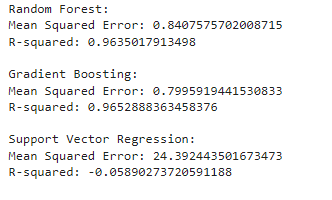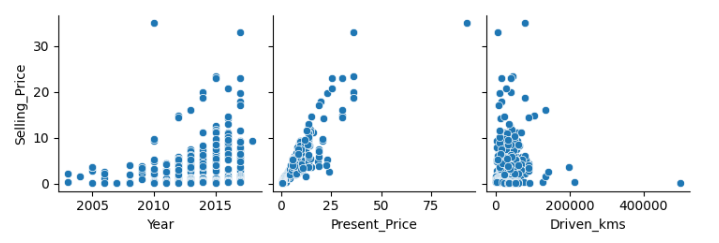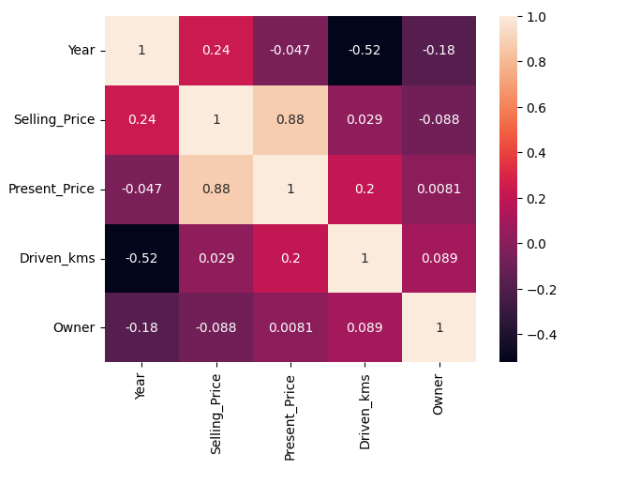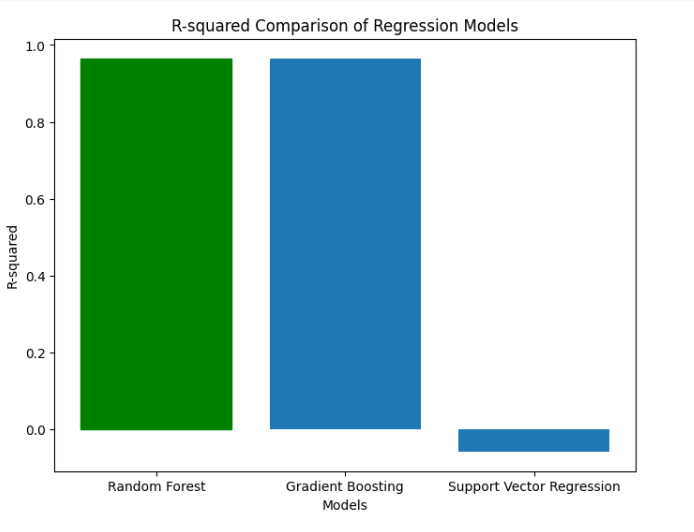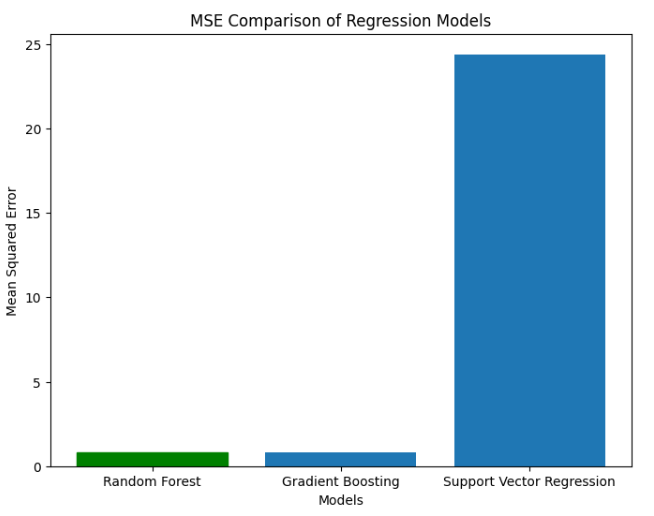

**FULL CODE**

---



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 

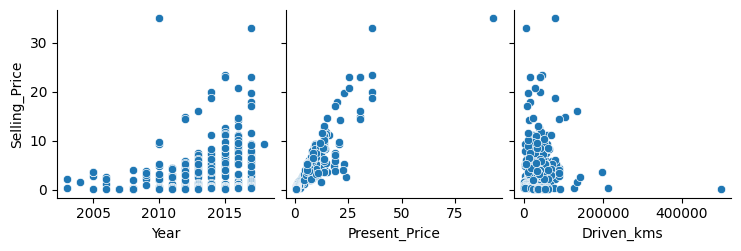

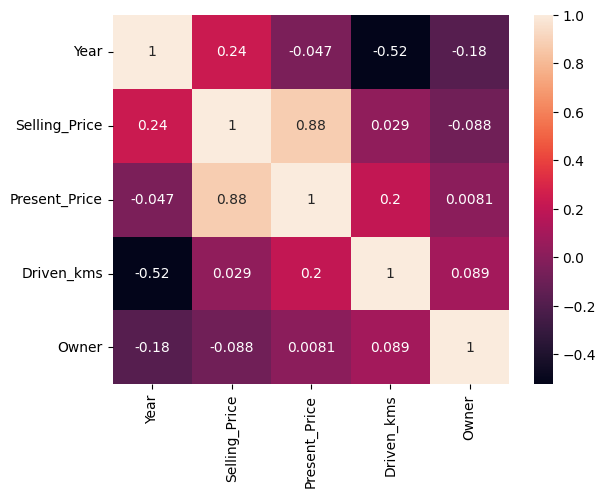


Random Forest:
Mean Squared Error: 0.7444701814754106
R-squared: 0.9676817325464581

Gradient Boosting:
Mean Squared Error: 0.802074975058442
R-squared: 0.965181045249711

Support Vector Regression:
Mean Squared Error: 24.392443501673473
R-squared: -0.05890273720591188


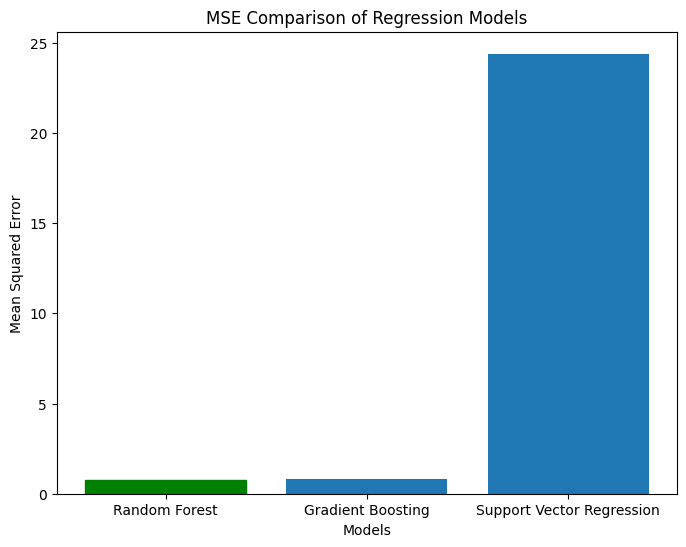

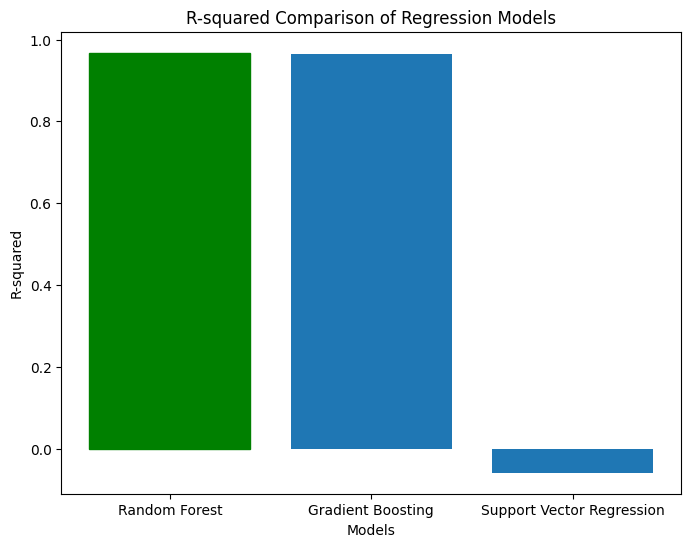


The 'Random Forest' model is the best across both MSE and R-squared.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you are running this code in a Google Colab environment
from google.colab import drive
drive.mount('/content/drive')

# 1. Load and Explore Data
data = pd.read_csv('/content/drive/MyDrive/Dataset/car data.csv')
print(data.head())
print(data.info())
print(data.describe())

# 2. Visualize Data
sns.pairplot(data, x_vars=['Year', 'Present_Price', 'Driven_kms'], y_vars='Selling_Price')
plt.show()

numerical_data = data.select_dtypes(include=['float', 'int'])
sns.heatmap(numerical_data.corr(), annot=True)
plt.show()

# 3. Data Preprocessing
# 3.1 Handle Missing Values (if any)
data['Present_Price'].fillna(data['Present_Price'].mean(), inplace=True)

# 3.2 Encode Categorical Features
label_encoder = LabelEncoder()
data['Fuel_Type'] = label_encoder.fit_transform(data['Fuel_Type'])
data['Selling_type'] = label_encoder.fit_transform(data['Selling_type'])
data['Transmission'] = label_encoder.fit_transform(data['Transmission'])

# 3.3 Remove Irrelevant Features
data = data.drop('Car_Name', axis=1)

# 3.4 Feature Scaling
scaler = StandardScaler()
data[['Present_Price', 'Driven_kms']] = scaler.fit_transform(data[['Present_Price', 'Driven_kms']])

# 4. Model Building and Evaluation
# 4.1 Split Data
X = data.drop('Selling_Price', axis=1)
y = data['Selling_Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4.2 Train and Evaluate Models
# 4.2.1 Random Forest
rf_model = RandomForestRegressor()
param_grid = {'n_estimators': [100, 200, 300],
              'max_depth': [5, 10, 15],
              'min_samples_split': [2, 5, 10]}
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train, y_train)
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("\nRandom Forest:")
print("Mean Squared Error:", mse_rf)
print("R-squared:", r2_rf)

# 4.2.2 Gradient Boosting
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
print("\nGradient Boosting:")
print("Mean Squared Error:", mse_gb)
print("R-squared:", r2_gb)

# 4.2.3 Support Vector Regression
svr_model = SVR()
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)

mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print("\nSupport Vector Regression:")
print("Mean Squared Error:", mse_svr)
print("R-squared:", r2_svr)

# 5. Model Comparison and Selection
mse_scores = [mse_rf, mse_gb, mse_svr]
r2_scores = [r2_rf, r2_gb, r2_svr]

best_model_index_mse = np.argmin(mse_scores)
best_model_index_r2 = np.argmax(r2_scores)

# 6. Visualize Model Performance
models = ['Random Forest', 'Gradient Boosting', 'Support Vector Regression']

# Determine if a single model is best across both metrics
best_model_across_metrics = None
if best_model_index_mse == best_model_index_r2:
   best_model_across_metrics = models[best_model_index_mse]


plt.figure(figsize=(8, 6))
bars = plt.bar(models, mse_scores)
bars[best_model_index_mse].set_color('green')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.title('MSE Comparison of Regression Models')
plt.show()

plt.figure(figsize=(8, 6))
bars = plt.bar(models, r2_scores)
bars[best_model_index_r2].set_color('green')
plt.xlabel('Models')
plt.ylabel('R-squared')
plt.title('R-squared Comparison of Regression Models')
plt.show()

# Print the best model across both metrics
if best_model_across_metrics:
  print(f"\nThe '{best_model_across_metrics}' model is the best across both MSE and R-squared.")
else:
  print("\nNo single model is the best across both MSE and R-squared.")

**End of 3 Tasks**

---

